# Примеры к лекции 4. Дискретное во времени преобразование Фурье (ДВПФ).
Лекции по курсу "Дискретные преобразования сигналов", 3 курс ФРКТ МФТИ 

In [7]:
import numpy as np                # импорт бибилиотеки numpy
import matplotlib.pyplot as plt   # импорт модуля matplotlib.pyplot

In [8]:
# Если используете Jupyter, то можно поменять backend matplotlib на notebook
%matplotlib notebook
# Для использования backend matplotlib inline, раскомментируйте строку ниже.
# %matplotlib inline

## Вычисление ДВПФ

In [9]:
def dtft(x, M=2048):
    return  np.arange(M)/M-0.5, np.fft.fftshift(np.fft.fft(x, M))

* `nu` — массив частот $\nu \in [-0.5;0.5)$ с шагом сетки $\Delta \nu =1/M$,
* `X` — значения ДВПФ $X(\nu )$ в этих точках, 
* `dtft` — функция, 
* `x` — последовательность отсчетов, 
* `M` — число точек на сетки оси частот, в которых вычисляется ДВПФ. 

Определим ДВПФ последовательности $x[k]$ 

In [20]:
N=19
nu0=2/N
k=np.arange(N)
#x=np.ones(1) # единичных импульс
#x=np.ones(N) # последовательность из N единичных импульсов
#x=np.sin(2*np.pi*nu0*k) # отсчеты sin
x=np.cos(2*np.pi*nu0*k) # отсчеты cos
nu, X = dtft(x, M=2048)
x

array([ 1.        ,  0.78914051,  0.24548549, -0.40169542, -0.87947375,
       -0.9863613 , -0.67728157, -0.08257935,  0.54694816,  0.94581724,
        0.94581724,  0.54694816, -0.08257935, -0.67728157, -0.9863613 ,
       -0.87947375, -0.40169542,  0.24548549,  0.78914051])

<IPython.core.display.Javascript object>


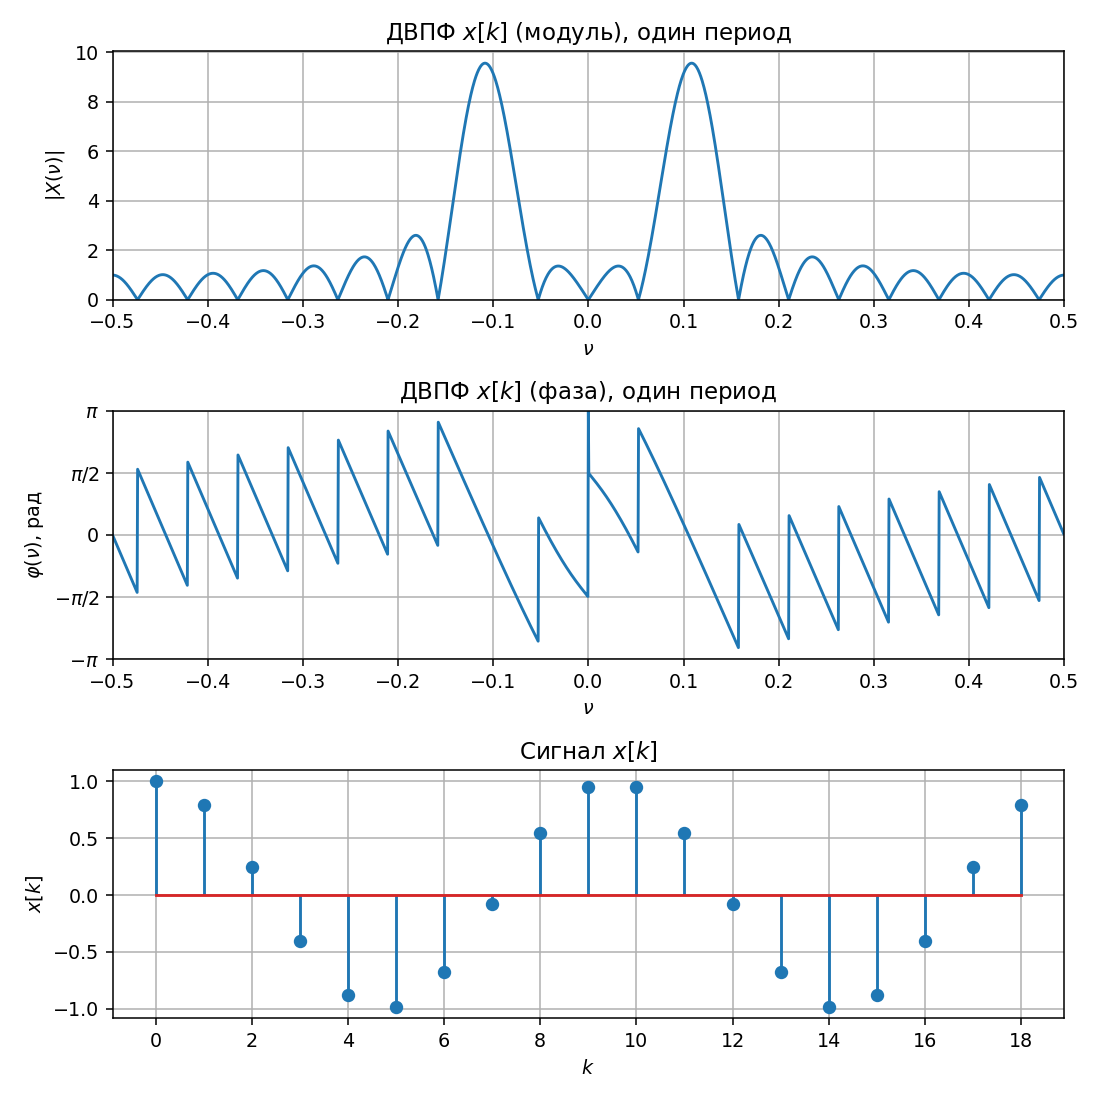

In [21]:
plt.figure(figsize=[8, 8])
plt.subplot(3, 1, 1)
nu, W = dtft(x, M=2048)
plt.plot(nu, abs(X))

plt.xlim([-0.5, 0.5])
plt.ylim(bottom=0)
plt.title('ДВПФ $x[k]$ (модуль), один период')
plt.xlabel('$\\nu$')
plt.ylabel('$|X(\\nu)|$')
plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(nu, np.angle(W))
plt.xlim([-0.5, 0.5])
plt.ylim([-np.pi, np.pi])
plt.title('ДВПФ $x[k]$ (фаза), один период')
plt.xlabel('$\\nu$')
plt.ylabel('$\\varphi(\\nu)$, рад')
plt.yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], labels=("$-\\pi$", "$-\\pi/2$", "$0$", "$\\pi/2$", "$\\pi$"))
plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()


plt.subplot(3, 1, 3)
plt.stem(x)
plt.grid()
plt.title('Сигнал $x[k]$')
plt.xlabel('$k$')
plt.ylabel('$x[k]$')
plt.xticks(ticks=np.arange(x.size)[::max(int(np.ceil(N/10)), 1)])
plt.tight_layout()